In [1]:
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('performance.csv')

In [3]:
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
df.drop(['Name', 'GamesPlayed','MinutesPlayed','FreeThrowMade','PointsPerGame','FieldGoalsMade', 'FieldGoalsAttempt', 'FieldGoalPercent','3PointMade','3PointAttempt','3PointPercent','FreeThrowAttempt', 'FreeThrowPercent', 'Assists','Steals', 'Blocks','Turnovers','Target'], axis=1, inplace=True)

In [5]:
df.head()

,OffensiveRebounds,DefensiveRebounds,Rebounds
0,0.7,3.4,4.1
1,0.5,2.0,2.4
2,0.5,1.7,2.2
3,1.0,0.9,1.9
4,1.0,1.5,2.5


In [6]:
df = df.reindex(columns=['Rebounds','OffensiveRebounds','DefensiveRebounds'])
df.head()

,Rebounds,OffensiveRebounds,DefensiveRebounds
0,4.1,0.7,3.4
1,2.4,0.5,2.0
2,2.2,0.5,1.7
3,1.9,1.0,0.9
4,2.5,1.0,1.5


In [7]:
df.describe()

,Rebounds,OffensiveRebounds,DefensiveRebounds
count,1340.000000,1340.000000,1340.000000
mean,3.034478,1.009403,2.025746
std,2.057774,0.777119,1.360008
min,0.300000,0.000000,0.200000
25%,1.500000,0.400000,1.000000
50%,2.500000,0.800000,1.700000
75%,4.000000,1.400000,2.600000
max,13.900000,5.300000,9.600000


In [8]:
cluster_numbers = range(1, 9)
models = [KMeans(n_clusters = cluster) for cluster in cluster_numbers]
score = [model.fit(df).score(df) for model in models]

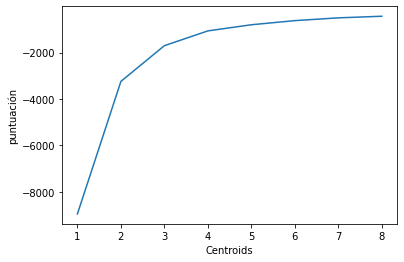

In [9]:
plt.plot(cluster_numbers, score)
plt.xlabel('Centroids')
plt.ylabel('puntuación')
plt.show()

In [10]:
k_means = KMeans(n_clusters=6)
k_means.fit(df)

KMeans(n_clusters=6)

In [11]:
k_means.labels_

array([1, 3, 3, ..., 1, 0, 0])

In [12]:
k_means.cluster_centers_

array([[ 1.19769585,  0.37741935,  0.8202765 ],
       [ 3.75087719,  1.26140351,  2.49403509],
       [11.03333333,  3.81666667,  7.19444444],
       [ 2.36763158,  0.75447368,  1.61447368],
       [ 7.875     ,  2.6875    ,  5.178125  ],
       [ 5.50377358,  1.89874214,  3.60566038]])

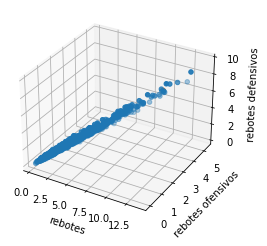

In [13]:
df_numpify = df.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_numpify[:, 0], df_numpify[:, 1], df_numpify[:, 2])
centers = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[
                       :, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel('rebotes')
axis.set_ylabel('rebotes ofensivos')
axis.set_zlabel('rebotes defensivos')
plt.show()

In [14]:
performance_classification = [
    'rebote malo',
    'rebote promedio',
    'rebote estandar',
    'rebote bueno',
    'rebote perfecto',
    'rebote estrella'
    ]

In [17]:
df2 = pd.read_csv('performance.csv')

In [18]:
df2['rebote Classification'] = k_means.labels_

In [19]:
df2.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target,rebote Classification
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,1
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,3
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,3
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,3
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,3
